Натренувати як мінімум 2 моделі кластеризації.

Підібрати оптимальну кількість кластерів використовуючи як мінімум 2 метрики.

In [73]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
# Завантаження та підготовка даних
data = pd.read_csv("../south+german+credit+update/SouthGermanCredit.asc", sep=' ')

# Видалення цільової змінної
X = data.drop('kredit', axis=1)

# Нормалізація даних
scaler = StandardScaler()
X_scaled  = scaler.fit_transform(X)
X.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1


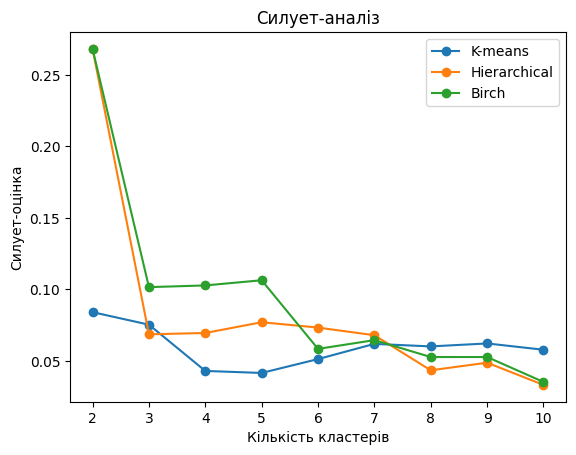

In [85]:
# Силует-аналіз
silhouette_scores_kmeans = []
silhouette_scores_hierarchical = []
silhouette_scores_birch = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    hierarchical = AgglomerativeClustering(n_clusters=k)
    birch = Birch(n_clusters=k)
    
    kmeans_labels = kmeans.fit_predict(X_scaled)
    hierarchical_labels = hierarchical.fit_predict(X_scaled)
    birch_labels = birch.fit_predict(X_scaled)
    
    silhouette_scores_kmeans.append(silhouette_score(X_scaled, kmeans_labels))
    silhouette_scores_hierarchical.append(silhouette_score(X_scaled, hierarchical_labels))
    silhouette_scores_birch.append(silhouette_score(X_scaled, birch_labels))

plt.plot(range(2, 11), silhouette_scores_kmeans, marker='o', label='K-means')
plt.plot(range(2, 11), silhouette_scores_hierarchical, marker='o', label='Hierarchical')
plt.plot(range(2, 11), silhouette_scores_birch, marker='o', label='Birch')
plt.xlabel('Кількість кластерів')
plt.ylabel('Силует-оцінка')
plt.title('Силует-аналіз')
plt.legend()
plt.show()

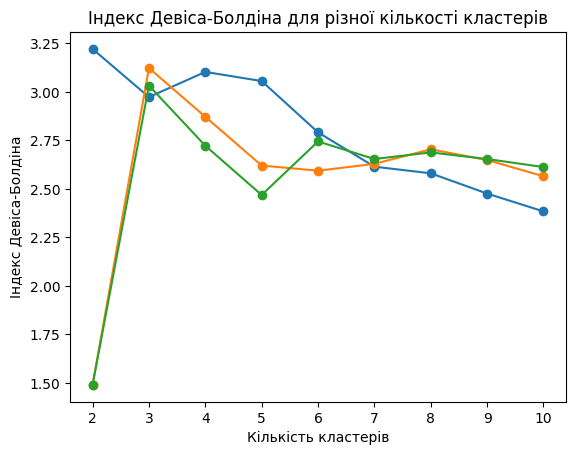

In [84]:
# Індекс Девіса-Болдіна (Davies-Bouldin Index)
db_scores_kmeans = []
db_scores_hierarchical = []
db_scores_birch = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    hierarchical = AgglomerativeClustering(n_clusters=k)
    birch = Birch(n_clusters=k)
    
    kmeans_labels = kmeans.fit_predict(X_scaled)
    hierarchical_labels = hierarchical.fit_predict(X_scaled)
    birch_labels = birch.fit_predict(X_scaled)

    db_scores_kmeans.append(davies_bouldin_score(X_scaled, kmeans_labels))
    db_scores_hierarchical.append(davies_bouldin_score(X_scaled, hierarchical_labels))
    db_scores_birch.append(davies_bouldin_score(X_scaled, birch_labels))

plt.plot(range(2, 11), db_scores_kmeans, marker='o', label='K-means')
plt.plot(range(2, 11), db_scores_hierarchical, marker='o', label='Hierarchical')
plt.plot(range(2, 11), db_scores_birch, marker='o', label='Birch')
plt.xlabel('Кількість кластерів')
plt.ylabel('Індекс Девіса-Болдіна')
plt.title('Індекс Девіса-Болдіна для різної кількості кластерів')
plt.show()

In [86]:
# Припустимо, що оптимальна кількість кластерів - 7
optimal_k = 7

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
hierarchical_final = AgglomerativeClustering(n_clusters=optimal_k)
birch_final = Birch(n_clusters=optimal_k)

kmeans_labels = kmeans_final.fit_predict(X_scaled)
hierarchical_labels = hierarchical_final.fit_predict(X_scaled)
birch_labels = birch_final.fit_predict(X_scaled)

# Додаємо мітки кластерів до оригінальних даних
data['KMeans_Cluster'] = kmeans_labels
data['Hierarchical_Cluster'] = hierarchical_labels
data['Birch_Cluster'] = birch_labels

# Аналіз результатів
print(data.groupby('KMeans_Cluster').mean())
print(data.groupby('Hierarchical_Cluster').mean())
print(data.groupby('Birch_Cluster').mean())

print(data['KMeans_Cluster'].value_counts())
print(data['Hierarchical_Cluster'].value_counts())
print(data['Birch_Cluster'].value_counts())

                laufkont   laufzeit     moral      verw        hoehe  \
KMeans_Cluster                                                         
0               3.504587  19.298165  2.899083  2.788991  2555.862385   
1               2.888889  16.392157  3.150327  2.895425  1947.313725   
2               2.337349  37.397590  2.024096  7.228916  7285.915663   
3               2.220339  32.906780  2.449153  1.703390  6635.279661   
4               1.888889  16.537037  2.070370  2.270370  2127.033333   
5               2.622951  18.991803  2.581967  2.680328  3015.204918   
6               2.361111  11.638889  2.777778  1.000000  2396.750000   

                sparkont   beszeit      rate    famges    buerge  ...  \
KMeans_Cluster                                                    ...   
0               1.922018  3.366972  3.137615  2.857798  1.045872  ...   
1               2.862745  4.222222  3.352941  2.679739  1.098039  ...   
2               1.987952  3.144578  2.301205  2.590361  1.1